#### Bibliothèques

In [322]:
import pandas as pd
import numpy as np
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn import mixture
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#### Données

In [2]:
df_red = pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
df_white = pd.read_csv('winequality-white.csv', delimiter=';')

In [4]:
df_tot = pd.concat([df_red, df_white])

#### Création des classes

In [5]:
df_tot['rank'] = np.select([(df_tot['quality'] <= 5), (df_tot['quality'] > 5) & (df_tot['quality'] <= 6), (df_tot['quality'] > 6)], ['low', 'middle', 'high'])

In [7]:
df_tot.drop('quality', axis=1, inplace=True)

#### Mélange aléatoire des données

In [27]:
df_tot = df_tot.sample(frac=1)

#### Divison des données entre apprentissage et test

In [202]:
df_train = df_tot.iloc[:5198, :]

In [47]:
df_test = df_tot.iloc[5198:, :]

In [203]:
train_X = df_train.iloc[:, :11]

In [204]:
train_y = df_train.iloc[:, 11]

In [63]:
test_X = df_test.iloc[:, :11]

In [64]:
test_y = df_test.iloc[:, 11]

#### Essai de GMM avec différents types de covariances

In [235]:
model = mixture.GaussianMixture(n_components=3,
                         covariance_type='tied',
                         max_iter=100,
                         n_init=100,
                         init_params='kmeans',
                         verbose=0,
                         random_state=1
                        )

In [236]:
classif = model.fit(X = train_X, y = train_y)

In [237]:
pred = model.predict(X = test_X)

In [243]:
accuracy_score(test_y2, pred)

0.41647421093148573

In [ ]:
res1 = [0] * 80
for i in range(1, 200, 10):
    model = mixture.GaussianMixture(n_components=3,
                         covariance_type='tied',
                         max_iter=i,
                         n_init=100,
                         init_params='kmeans',
                         verbose=0,
                         random_state=1
                        )
    classif = model.fit(X = train_X, y = train_y)
    pred = model.predict(X = test_X)
    res1[i] = accuracy_score(test_y2, pred)

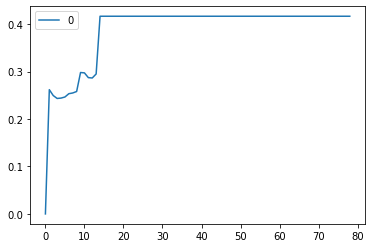

In [307]:
# 14 max_iter
res1.plot();

In [325]:
f1_score(test_y2, pred, average='micro')

0.41647421093148573